# [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd

## Object creation
See the Data Structure Intro section.

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df)

                   A         B         C         D
2013-01-01 -0.479549 -0.026886  0.093867 -1.550461
2013-01-02 -0.984945  0.667843 -0.891149  1.239040
2013-01-03  0.156382  0.883110 -1.170481 -0.209165
2013-01-04 -1.866800 -0.370600 -1.368356  0.083444
2013-01-05 -1.187673 -1.113137  0.716594  0.237083
2013-01-06  1.110699  0.954859  1.495033 -0.237437


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


The columns of the resulting DataFrame have different dtypes.

The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:
![df2.<TAB>](img/df2_tab.png)

As you can see, the columns A, B, C, and D are automatically tab completed. E and F are there as well; the rest of the attributes have been truncated for brevity.

## Viewing data
See the Basics section.

Here is how to view the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.479549,-0.026886,0.093867,-1.550461
2013-01-02,-0.984945,0.667843,-0.891149,1.239040
2013-01-03,0.156382,0.883110,-1.170481,-0.209165
2013-01-04,-1.866800,-0.370600,-1.368356,0.083444
2013-01-05,-1.187673,-1.113137,0.716594,0.237083


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.866800,-0.370600,-1.368356,0.083444
2013-01-05,-1.187673,-1.113137,0.716594,0.237083
2013-01-06,1.110699,0.954859,1.495033,-0.237437


Display the index, columns:

Display the index, columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and **NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [11]:
df.to_numpy()

array([[-0.4795491 , -0.02688608,  0.09386666, -1.55046067],
       [-0.98494466,  0.66784343, -0.8911486 ,  1.23903958],
       [ 0.15638166,  0.88310954, -1.17048053, -0.2091647 ],
       [-1.86679993, -0.37060007, -1.36835561,  0.0834445 ],
       [-1.18767334, -1.11313744,  0.7165937 ,  0.23708255],
       [ 1.11069877,  0.95485929,  1.49503251, -0.23743665]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>**Note**
> DataFrame.to_numpy() does not include the index or column labels in the output.

describe() shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.541981,0.165865,-0.187415,-0.072916
std,1.057472,0.818502,1.147455,0.902280
min,-1.866800,-1.113137,-1.368356,-1.550461
25%,-1.136991,-0.284672,-1.100648,-0.230369
50%,-0.732247,0.320479,-0.398641,-0.062860
75%,-0.002601,0.829293,0.560912,0.198673
max,1.110699,0.954859,1.495033,1.239040


Transposing your data:

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.479549,-0.984945,0.156382,-1.866800,-1.187673,1.110699
B,-0.026886,0.667843,0.883110,-0.370600,-1.113137,0.954859
C,0.093867,-0.891149,-1.170481,-1.368356,0.716594,1.495033
D,-1.550461,1.239040,-0.209165,0.083444,0.237083,-0.237437


Sorting by an axis:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.550461,0.093867,-0.026886,-0.479549
2013-01-02,1.239040,-0.891149,0.667843,-0.984945
2013-01-03,-0.209165,-1.170481,0.883110,0.156382
2013-01-04,0.083444,-1.368356,-0.370600,-1.866800
2013-01-05,0.237083,0.716594,-1.113137,-1.187673
2013-01-06,-0.237437,1.495033,0.954859,1.110699


Sorting by values:

In [16]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,-1.187673,-1.113137,0.716594,0.237083
2013-01-04,-1.866800,-0.370600,-1.368356,0.083444
2013-01-01,-0.479549,-0.026886,0.093867,-1.550461
2013-01-02,-0.984945,0.667843,-0.891149,1.239040
2013-01-03,0.156382,0.883110,-1.170481,-0.209165
2013-01-06,1.110699,0.954859,1.495033,-0.237437


## Selection

>**Note**
>While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.

### Getting
Selecting a single column, which yields a Series, equivalent to df.A:

In [17]:
df["A"]

2013-01-01   -0.479549
2013-01-02   -0.984945
2013-01-03    0.156382
2013-01-04   -1.866800
2013-01-05   -1.187673
2013-01-06    1.110699
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.479549,-0.026886,0.093867,-1.550461
2013-01-02,-0.984945,0.667843,-0.891149,1.239040
2013-01-03,0.156382,0.883110,-1.170481,-0.209165


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.984945,0.667843,-0.891149,1.239040
2013-01-03,0.156382,0.883110,-1.170481,-0.209165
2013-01-04,-1.866800,-0.370600,-1.368356,0.083444


### Selection by label
See more in Selection by Label.

For getting a cross section using a label:

In [20]:
df.loc[dates[0]]

A   -0.479549
B   -0.026886
C    0.093867
D   -1.550461
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.479549,-0.026886
2013-01-02,-0.984945,0.667843
2013-01-03,0.156382,0.883110
2013-01-04,-1.866800,-0.370600
2013-01-05,-1.187673,-1.113137
2013-01-06,1.110699,0.954859


Showing label slicing, both endpoints are included:

In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.984945,0.667843
2013-01-03,0.156382,0.883110
2013-01-04,-1.866800,-0.370600


Reduction in the dimensions of the returned object:

In [23]:
df.loc["20130102", ["A", "B"]]

A   -0.984945
B    0.667843
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [24]:
df.loc[dates[0], "A"]

-0.4795490998167699

For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], "A"]

-0.4795490998167699

### Selection by position
See more in Selection by Position.

Select via the position of the passed integers:

In [26]:
df.iloc[3]

A   -1.866800
B   -0.370600
C   -1.368356
D    0.083444
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/Python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.866800,-0.370600
2013-01-05,-1.187673,-1.113137


By lists of integer position locations, similar to the NumPy/Python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.984945,-0.891149
2013-01-03,0.156382,-1.170481
2013-01-05,-1.187673,0.716594


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.984945,0.667843,-0.891149,1.239040
2013-01-03,0.156382,0.883110,-1.170481,-0.209165


For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.026886,0.093867
2013-01-02,0.667843,-0.891149
2013-01-03,0.883110,-1.170481
2013-01-04,-0.370600,-1.368356
2013-01-05,-1.113137,0.716594
2013-01-06,0.954859,1.495033


For getting a value explicitly:

In [31]:
df.iloc[1, 1]

0.6678434332647019

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

0.6678434332647019

### Boolean indexing
Using a single column’s values to select data.

In [33]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.156382,0.883110,-1.170481,-0.209165
2013-01-06,1.110699,0.954859,1.495033,-0.237437


Selecting values from a DataFrame where a boolean condition is met.

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.093867,NaN
2013-01-02,NaN,0.667843,NaN,1.239040
2013-01-03,0.156382,0.883110,NaN,NaN
2013-01-04,NaN,NaN,NaN,0.083444
2013-01-05,NaN,NaN,0.716594,0.237083
2013-01-06,1.110699,0.954859,1.495033,NaN


Using the isin() method for filtering:

In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.479549,-0.026886,0.093867,-1.550461,one
2013-01-02,-0.984945,0.667843,-0.891149,1.239040,one
2013-01-03,0.156382,0.883110,-1.170481,-0.209165,two
2013-01-04,-1.866800,-0.370600,-1.368356,0.083444,three
2013-01-05,-1.187673,-1.113137,0.716594,0.237083,four
2013-01-06,1.110699,0.954859,1.495033,-0.237437,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.156382,0.883110,-1.170481,-0.209165,two
2013-01-05,-1.187673,-1.113137,0.716594,0.237083,four


## Setting
Setting a new column automatically aligns the data by the indexes.

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
print(s1)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64


In [38]:
df["F"] = s1

Setting values by label:

In [39]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [40]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [41]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations.

In [42]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.093867,5,NaN
2013-01-02,-0.984945,0.667843,-0.891149,5,1.0
2013-01-03,0.156382,0.883110,-1.170481,5,2.0
2013-01-04,-1.866800,-0.370600,-1.368356,5,3.0
2013-01-05,-1.187673,-1.113137,0.716594,5,4.0
2013-01-06,1.110699,0.954859,1.495033,5,5.0


A where operation with setting.

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.093867,-5,NaN
2013-01-02,-0.984945,-0.667843,-0.891149,-5,-1.0
2013-01-03,-0.156382,-0.883110,-1.170481,-5,-2.0
2013-01-04,-1.866800,-0.370600,-1.368356,-5,-3.0
2013-01-05,-1.187673,-1.113137,-0.716594,-5,-4.0
2013-01-06,-1.110699,-0.954859,-1.495033,-5,-5.0


## Missing data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
print(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.093867  5  NaN  1.0
2013-01-02 -0.984945  0.667843 -0.891149  5  1.0  1.0
2013-01-03  0.156382  0.883110 -1.170481  5  2.0  NaN
2013-01-04 -1.866800 -0.370600 -1.368356  5  3.0  NaN


To drop any rows that have missing data.

In [45]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.984945,0.667843,-0.891149,5,1.0,1.0


Filling missing data.

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.093867,5,5.0,1.0
2013-01-02,-0.984945,0.667843,-0.891149,5,1.0,1.0
2013-01-03,0.156382,0.883110,-1.170481,5,2.0,5.0
2013-01-04,-1.866800,-0.370600,-1.368356,5,3.0,5.0


To get the boolean mask where values are nan.

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
See the Basic section on Binary Ops.

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [48]:
df.mean()

A   -0.462056
B    0.170346
C   -0.187415
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [49]:
df.mean(1)

2013-01-01    1.273467
2013-01-02    0.958350
2013-01-03    1.373802
2013-01-04    0.878849
2013-01-05    1.483157
2013-01-06    2.712118
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.843618,-0.116890,-2.170481,4.0,1.0
2013-01-04,-4.866800,-3.370600,-4.368356,2.0,0.0
2013-01-05,-6.187673,-6.113137,-4.283406,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data:

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.093867,5,NaN
2013-01-02,-0.984945,0.667843,-0.797282,10,1.0
2013-01-03,-0.828563,1.550953,-1.967762,15,3.0
2013-01-04,-2.695363,1.180353,-3.336118,20,6.0
2013-01-05,-3.883036,0.067215,-2.619524,25,10.0
2013-01-06,-2.772338,1.022075,-1.124492,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.977499
B    2.067997
C    2.863388
D    0.000000
F    4.000000
dtype: float64

## Histogramming
See more at Histogramming and Discretization.

In [54]:
 s = pd.Series(np.random.randint(0, 7, size=10))
print(s)

0    6
1    3
2    3
3    6
4    6
5    6
6    2
7    3
8    2
9    0
dtype: int32


In [55]:
s.value_counts()

6    4
3    3
2    2
0    1
dtype: int64

## String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.


In [56]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge
### Concat
pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.084776,-0.390101,-0.303696,0.093379
1,-1.045367,-0.423962,0.456433,-0.699108
2,1.361498,-1.015694,2.136178,-1.176355
3,0.333606,1.028225,-0.949420,1.054838
4,0.192030,-0.841731,-1.263280,0.120028
5,0.387546,1.485063,0.843122,0.391988
6,-0.551960,0.251121,0.956415,0.227327
7,-0.317434,0.288500,-0.495254,-1.042919
8,0.904007,1.016085,0.572040,1.141788
9,-0.183182,1.644201,-1.187236,0.500620


In [58]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.084776,-0.390101,-0.303696,0.093379
1,-1.045367,-0.423962,0.456433,-0.699108
2,1.361498,-1.015694,2.136178,-1.176355
3,0.333606,1.028225,-0.949420,1.054838
4,0.192030,-0.841731,-1.263280,0.120028
5,0.387546,1.485063,0.843122,0.391988
6,-0.551960,0.251121,0.956415,0.227327
7,-0.317434,0.288500,-0.495254,-1.042919
8,0.904007,1.016085,0.572040,1.141788
9,-0.183182,1.644201,-1.187236,0.500620


>**Note**
>
>Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it. See Appending to dataframe for more.

#### Join
SQL style merges. See the Database style joining section.

In [59]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right

,key,rval
0,foo,4
1,foo,5


In [61]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [62]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [63]:
right

,key,rval
0,foo,4
1,bar,5


In [64]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the Grouping section.

In [65]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
print(df)

     A      B         C         D
0  foo    one -1.800616  1.255784
1  bar    one -1.705835  0.424233
2  foo    two -0.676660  0.638368
3  bar  three  0.634714  0.469236
4  foo    two -0.257464  0.672910
5  bar    two  1.665314  0.967807
6  foo    one -0.134918 -0.960986
7  foo  three  0.301037  0.634759


Grouping and then applying the sum() function to the resulting groups.

In [66]:
df.groupby("A").sum()

,C,D
A,,
bar,0.594193,1.861276
foo,-2.568621,2.240834


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.

In [67]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.705835  0.424233
    three  0.634714  0.469236
    two    1.665314  0.967807
foo one   -1.935535  0.294798
    three  0.301037  0.634759
    two   -0.934124  1.311277

## Reshaping
See the sections on Hierarchical Indexing and Reshaping.

### Stack

In [68]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
print(df2)

                     A         B
first second                    
bar   one     0.760149  1.425417
      two    -0.891519  0.260039
baz   one     0.677096 -0.133867
      two    -1.164950  0.288795


The stack() method “compresses” a level in the DataFrame’s columns.

In [69]:
stacked = df2.stack()
print(stacked)

first  second   
bar    one     A    0.760149
               B    1.425417
       two     A   -0.891519
               B    0.260039
baz    one     A    0.677096
               B   -0.133867
       two     A   -1.164950
               B    0.288795
dtype: float64


With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [70]:
stacked.unstack()

A         B
first second                    
bar   one     0.760149  1.425417
      two    -0.891519  0.260039
baz   one     0.677096 -0.133867
      two    -1.164950  0.288795

In [71]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.760149 -0.891519
      B  1.425417  0.260039
baz   A  0.677096 -1.164950
      B -0.133867  0.288795

In [72]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.760149  0.677096
       B  1.425417 -0.133867
two    A -0.891519 -1.164950
       B  0.260039  0.288795

### Pivot tables
See the section on Pivot Tables.

In [73]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
print(df)

        A  B    C         D         E
0     one  A  foo  0.397278 -1.578057
1     one  B  foo  1.344262  0.345378
2     two  C  foo -0.955287 -0.080987
3   three  A  bar  2.667066 -1.268033
4     one  B  bar -0.071990 -0.440626
5     one  C  bar -1.404377  0.186837
6     two  A  foo -0.158962  0.788308
7   three  B  foo -0.497302  0.012043
8     one  C  foo -0.364352 -2.267312
9     one  A  bar -0.210242  0.072095
10    two  B  bar -0.633978 -1.754388
11  three  C  bar -0.402286 -0.467832


We can produce pivot tables from this data very easily:

In [74]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.210242  0.397278
      B -0.071990  1.344262
      C -1.404377 -0.364352
three A  2.667066       NaN
      B       NaN -0.497302
      C -0.402286       NaN
two   A       NaN -0.158962
      B -0.633978       NaN
      C       NaN -0.955287

## Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.


In [75]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    25960
Freq: 5T, dtype: int32

Time zone representation:

In [76]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts)

2012-03-06   -0.291876
2012-03-07   -0.185667
2012-03-08    0.303917
2012-03-09    1.675014
2012-03-10    0.179416
Freq: D, dtype: float64


In [77]:
ts_utc = ts.tz_localize("UTC")
print(ts_utc)

2012-03-06 00:00:00+00:00   -0.291876
2012-03-07 00:00:00+00:00   -0.185667
2012-03-08 00:00:00+00:00    0.303917
2012-03-09 00:00:00+00:00    1.675014
2012-03-10 00:00:00+00:00    0.179416
Freq: D, dtype: float64


Converting to another time zone:

In [78]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.291876
2012-03-06 19:00:00-05:00   -0.185667
2012-03-07 19:00:00-05:00    0.303917
2012-03-08 19:00:00-05:00    1.675014
2012-03-09 19:00:00-05:00    0.179416
Freq: D, dtype: float64

Converting between time span representations:

In [79]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

2012-01-31   -0.115400
2012-02-29    0.277265
2012-03-31   -0.638888
2012-04-30    0.150653
2012-05-31   -0.344098
Freq: M, dtype: float64


In [80]:
ps = ts.to_period()
print(ps)

2012-01   -0.115400
2012-02    0.277265
2012-03   -0.638888
2012-04    0.150653
2012-05   -0.344098
Freq: M, dtype: float64


In [81]:
ps.to_timestamp()

2012-01-01   -0.115400
2012-02-01    0.277265
2012-03-01   -0.638888
2012-04-01    0.150653
2012-05-01   -0.344098
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [82]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
print(ts.head())

1990-03-01 09:00    1.909668
1990-06-01 09:00    1.274069
1990-09-01 09:00    0.685127
1990-12-01 09:00   -0.803420
1991-03-01 09:00    0.736874
Freq: H, dtype: float64


## Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [83]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Convert the raw grades to a categorical data type.

In [84]:
df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']


Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).

In [85]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default).

In [86]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [87]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [88]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
See the Plotting docs.

We use the standard convention for referencing the matplotlib API:


In [89]:
import matplotlib.pyplot as plt
plt.close("all")

<AxesSubplot:>

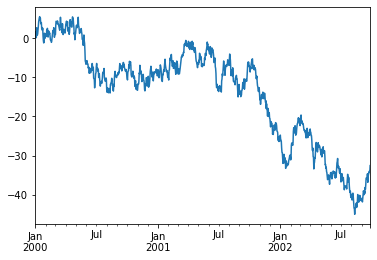

In [90]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

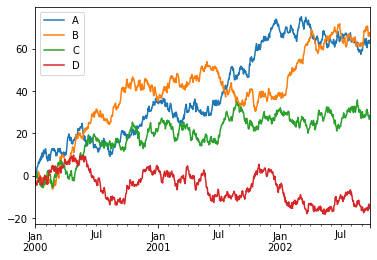

In [91]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## Getting data in/out
### CSV
Writing to a csv file.

In [92]:
df.to_csv("data/file01_01.csv")

Reading from a csv file.

In [93]:
pd.read_csv("data/file01_01.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.829138,0.495345,-0.940581,0.728194
1,2000-01-02,2.324015,0.178648,0.094250,-3.557360
2,2000-01-03,1.704821,-0.253607,-0.962868,-3.914540
3,2000-01-04,1.498936,-0.373237,0.202079,-4.160883
4,2000-01-05,2.102690,0.519090,0.694931,-4.528201
...,...,...,...,...,...
995,2002-09-22,63.497428,67.303045,28.330004,-13.359515
996,2002-09-23,62.643262,65.969610,26.837154,-13.938585
997,2002-09-24,62.569557,66.967750,26.687060,-14.986819
998,2002-09-25,62.732966,67.593970,27.316328,-15.439690


### HDF5
Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5).

> Note: You'll need to install `hdf5` and `pytables` before running the following code.
```shell
(eda_dev39) $ conda install hdf5
(eda_dev39) $ conda install pytables
```

Writing to a HDF5 Store.

In [94]:
df.to_hdf("data/file01_02.h5", "df")

Reading from a HDF5 Store.

In [95]:
pd.read_hdf("data/file01_02.h5", "df")

,A,B,C,D
2000-01-01,0.829138,0.495345,-0.940581,0.728194
2000-01-02,2.324015,0.178648,0.094250,-3.557360
2000-01-03,1.704821,-0.253607,-0.962868,-3.914540
2000-01-04,1.498936,-0.373237,0.202079,-4.160883
2000-01-05,2.102690,0.519090,0.694931,-4.528201
...,...,...,...,...
2002-09-22,63.497428,67.303045,28.330004,-13.359515
2002-09-23,62.643262,65.969610,26.837154,-13.938585
2002-09-24,62.569557,66.967750,26.687060,-14.986819
2002-09-25,62.732966,67.593970,27.316328,-15.439690


### Excel Reading and writing to MS Excel.

> Note: You'll need to install `openpyxl`, `xlrd` and `pyxlsb` before running the following code.
```shell
(eda_dev39) $ conda install -c anaconda openpyxl
(eda_dev39) $ conda install -c anaconda xlrd
(eda_dev39) $ conda install -c conda-forge pyxlsb
```

Writing to an excel file.

In [96]:
df.to_excel("data/file01_03.xlsx", sheet_name="Sheet1")

Reading from an excel file.

In [97]:
pd.read_excel("data/file01_03.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.829138,0.495345,-0.940581,0.728194
1,2000-01-02,2.324015,0.178648,0.094250,-3.557360
2,2000-01-03,1.704821,-0.253607,-0.962868,-3.914540
3,2000-01-04,1.498936,-0.373237,0.202079,-4.160883
4,2000-01-05,2.102690,0.519090,0.694931,-4.528201
...,...,...,...,...,...
995,2002-09-22,63.497428,67.303045,28.330004,-13.359515
996,2002-09-23,62.643262,65.969610,26.837154,-13.938585
997,2002-09-24,62.569557,66.967750,26.687060,-14.986819
998,2002-09-25,62.732966,67.593970,27.316328,-15.439690


### Gotchas
If you are attempting to perform an operation you might see an exception like:

In [98]:
import sys
try:
    if pd.Series([False, True, False]):
        print("I was true")
except:
        print("Unexpected error:", sys.exc_info()[0])

Unexpected error: <class 'ValueError'>


See Comparisons for an explanation and what to do.

See Gotchas as well.